In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Legion\Desktop\Python\Datasets\student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<h2>NaN Values</h2>

In [2]:
nan_info = dict(df.isna().sum())
def find_nan():
    for key in nan_info:
        if nan_info[key] > 0:
            return ('NaN values are present')
    
    return 'No NaN'
find_nan()

'No NaN'

<h2> Gender proportion and their study times</h2> 

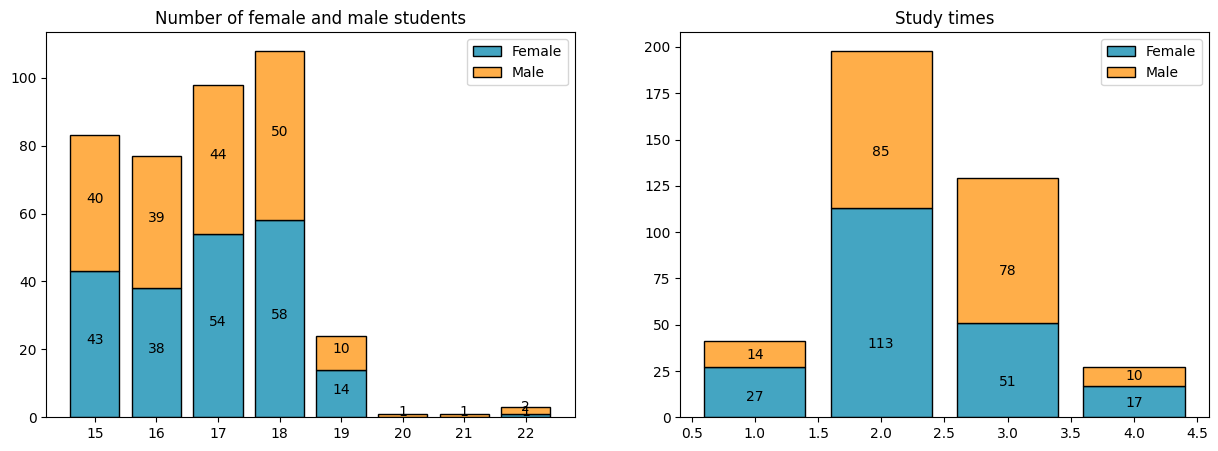

In [3]:
import matplotlib.pyplot as plt

#Proportion of female and male students
#Data
ages = df['age'].unique().tolist()
female = df.loc[df['sex'] == 'F']['age'].value_counts().tolist()
female = female + [0,0]
male = df.loc[df['sex'] == 'M']['age'].value_counts().tolist()

#Stacked Bar Chart
fig,axes = plt.subplots(1,2,figsize = (15,5))

axes[0].bar(ages,female, edgecolor = 'black', color = '#44a5c2', linewidth = 1, label = 'Female')
axes[0].bar(ages,male,bottom = female, edgecolor = 'black', color = "#ffae49", linewidth = 1, label = 'Male')

axes[0].set_title('Number of female and male students')
axes[0].legend()

for bar in axes[0].patches:
    if bar.get_height()>0:
        axes[0].text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    bar.get_height(), ha = 'center',
                    color = 'black', weight = 'ultralight', size = 10)
    else:
        pass

#Study times between male and female students
#Data
study_times = df['studytime'].unique()

male = df.loc[df['sex'] == 'M']['studytime'].value_counts()
male = male.tolist()
female = df.loc[df['sex'] == 'F']['studytime'].value_counts()
female = female.tolist()

#Stacked Bar Chart
axes[1].bar(study_times, female, edgecolor = 'black', color = "#44a5c2", linewidth = 1, label = 'Female')
axes[1].bar(study_times, male, bottom = female, edgecolor = 'black', color = '#ffae49', linewidth = 1, label = 'Male')

axes[1].set_title('Study times')
axes[1].legend()

for bar in axes[1].patches:
    if bar.get_height()>0:
        axes[1].text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/3,
                    bar.get_height(),
                    color = 'black', weight = 'ultralight', ha = 'center')
    else:
        pass

#plt show
plt.show()

The number of male and female students are relatively equal but as the age is over 18 years old, their is a significant drop which indicates most students graduate from high school before they are 19 yrs.

The second plot shows that female students tend to study slighty more that their male counterparts 

<h2> Family size and Grades of the students</h2>

We are also intersted to know does family size and the place of living the students could have any relationship with their last year exams score which do lead to their graduation

34


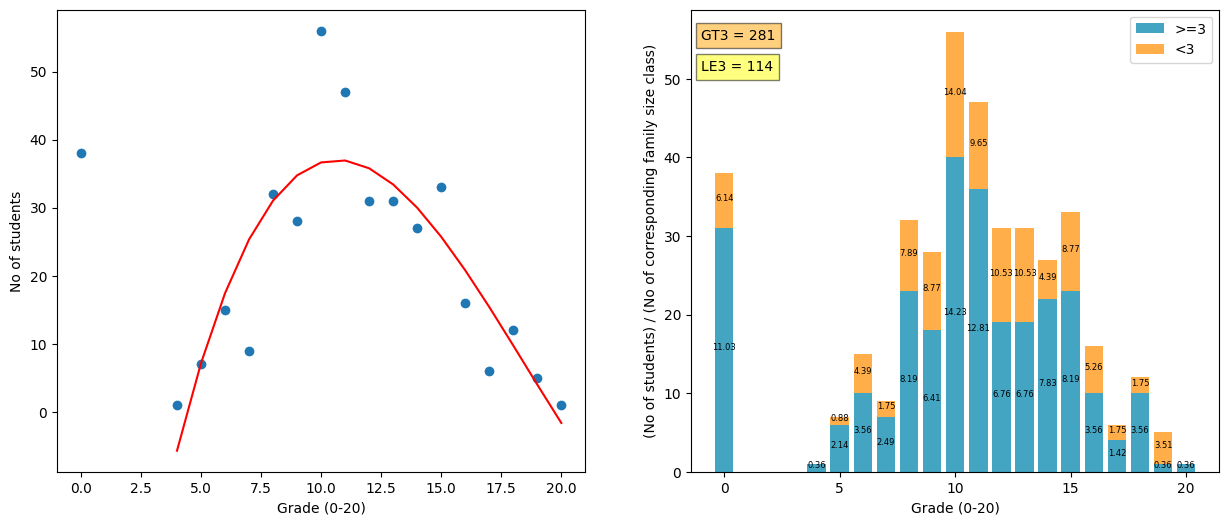

In [4]:
scs = df['G3'].value_counts()
scs = dict(sorted(scs.items(), key = lambda x:x[0]))

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def linear_model(ax, X,y,degree = 2):
    X, y = np.asarray(list(X)).reshape(-1,1), list(y)
    
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(X)
    
    lr = LinearRegression()
    lr.fit(X_poly,y)
    
    ax.plot(X,lr.predict(X_poly), color = 'red')
    return


fig, axes = plt.subplots(1,2,figsize = (15,6))
axes[0].scatter(scs.keys(),scs.values())

X, y = list(scs.keys())[1:], list(scs.values())[1:]
linear_model(axes[0],X, y , degree = 3)

axes[0].set_xlabel('Grade (0-20)')
axes[0].set_ylabel('No of students')


#second axis
g3_unique = df['G3'].unique()
g3_unique.sort()
g3_unique

def sort_dict(lst):
    for num in g3_unique:
        if num not in lst:
            lst[num] = 0
            
    lst = dict(sorted(lst.items(), key = lambda x:x[0]))
#     print(lst)
    return list(lst.values())

info_gt3 = df.loc[df['famsize'] == 'GT3']['G3'].value_counts()
info_gt3 = sort_dict(info_gt3)

info_lt3 = df.loc[df['famsize'] == 'LE3']['G3'].value_counts()
info_lt3 = sort_dict(info_lt3)

axes[1].bar(g3_unique, info_gt3, label = '>=3',color = '#44a5c2', linewidth = 1)
axes[1].bar(g3_unique, info_lt3, bottom = info_gt3, label = '<3', color = '#ffae49', linewidth = 1)

axes[1].legend()


i = 0
for bar in axes[1].patches:
    if bar.get_height()>0:
        if i <=17:
            axes[1].text(bar.get_x() + bar.get_width()/2,
                        bar.get_y() + bar.get_height()/2,
                        round((bar.get_height()/281)*100,2),ha = 'center',fontsize = 6)
        else:
            axes[1].text(bar.get_x() + bar.get_width()/2,
                        bar.get_y() + bar.get_height()/2,
                        round((bar.get_height()/114)*100,2), ha = 'center',fontsize = 6)
            
        i+=1
    else:
        pass
print(i)
    
    
axes[1].set_xlabel('Grade (0-20)')
axes[1].set_ylabel('(No of students) / (No of corresponding family size class)')

axes[1].text(-1, 55, 'GT3 = 281', fontsize = 10, 
         bbox = dict(facecolor = 'orange', alpha = 0.5))
axes[1].text(-1, 51, 'LE3 = 114', fontsize = 10, 
         bbox = dict(facecolor = 'yellow', alpha = 0.5))

plt.show()

We can conclude the less the family size is, the better the grades are. Because as it is plotted, the students with lower family size have better grades compared to other with higher family size and it becomes more obvious if we look at better and higher grades when higher percentage of <i>LE3 Famsize </i> have received better grades.

<h2> Rural or Urban? </h2>

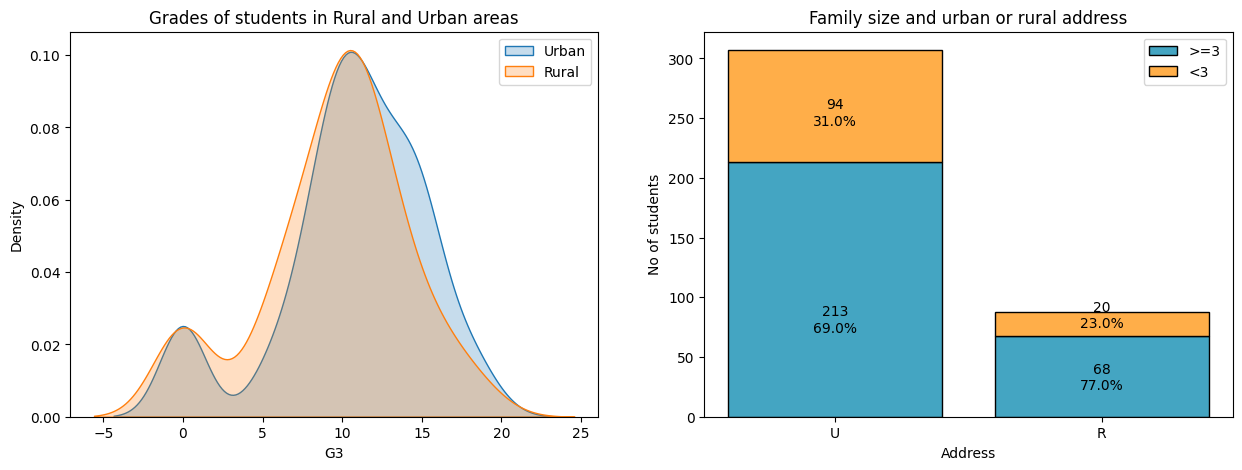

In [5]:
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize = (15,5))

#First ax
sns.kdeplot(data = df.loc[df['address'] == 'U'], x = 'G3', shade = True, label = 'Urban', ax = axes[0])
sns.kdeplot(data = df.loc[df['address'] == 'R'], x = 'G3', shade = True, label = 'Rural',ax = axes[0])

axes[0].legend()
axes[0].set_title('Grades of students in Rural and Urban areas')

#second ax
ads = df['address'].unique().tolist()

rural_gt3 = df.loc[(df['address'] == 'R') & (df['famsize'] == 'GT3')]['famsize'].size
urban_gt3 =  df.loc[(df['address'] == 'U') & (df['famsize'] == 'GT3')]['famsize'].size

rural_le3 = df.loc[(df['address'] == 'R') & (df['famsize'] == 'LE3')]['famsize'].size
urban_le3 =  df.loc[(df['address'] == 'U') & (df['famsize'] == 'LE3')]['famsize'].size

axes[1].bar(ads,[urban_gt3, rural_gt3], label = '>=3',color = '#44a5c2',
            linewidth = 1, edgecolor = 'black')
axes[1].bar(ads,[urban_le3, rural_le3],bottom = [urban_gt3, rural_gt3],label = "<3",
            color = '#ffae49', linewidth = 1, edgecolor = 'black')
axes[1].legend()

info = dict(df['address'].value_counts())
i = 0
for bar in axes[1].patches:
    if i%2==0:
        txt = "{}\n{}%".format(bar.get_height(),round(bar.get_height()/info['U'],2)*100)
        axes[1].text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/3,
                   txt, ha = 'center', color = 'black')
    else:
        txt = "{}\n{}%".format(bar.get_height(),round(bar.get_height()/info['R'],2)*100)
        axes[1].text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/3,
                    txt, ha = 'center', color = 'black')
    i+=1

axes[1].set_title('Family size and urban or rural address')  
axes[1].set_xlabel('Address')
axes[1].set_ylabel('No of students')

plt.show()

There is no clear relationship that shows being urban and rural means higher or lower grades.<br>
Also ost of the families in both rural and urban parts have more than 3 person in their family but when it comes to less than 3 persons, urban people have less family count as it is shown, 23% of rural people have family size less than 3 people but 30% urban counterparts have less than 3 people in their family and as shown before, the students coming from lower family size have achieved better grades than the ones coming from higher family size

<h2>Does parent's job have any effect on the students' grades?</h2>

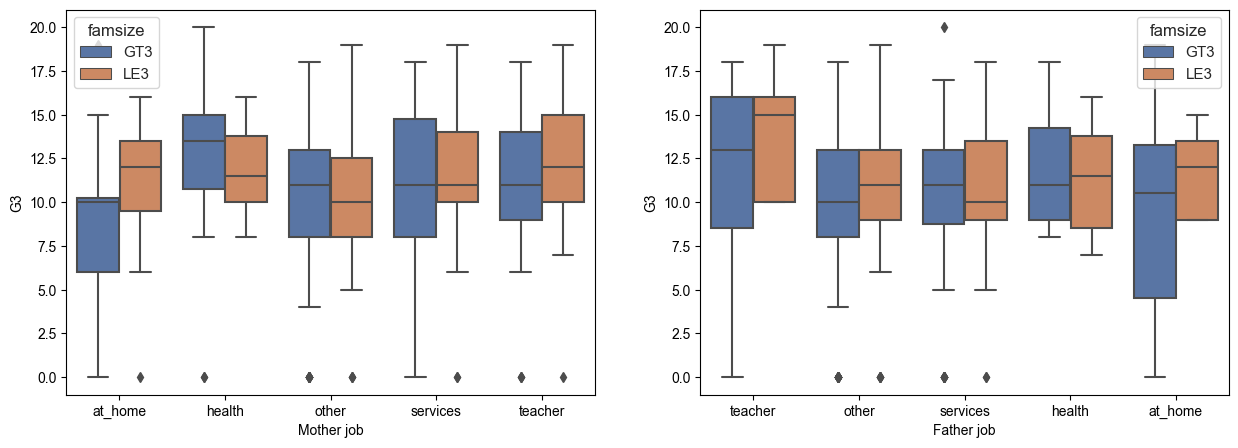

In [6]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.set(style="whitegrid")

sns.boxplot(data = df, x = 'Mjob', y = 'G3',ax = axes[0],hue = 'famsize')
axes[0].set_xlabel('Mother job')

sns.boxplot(data = df, x = 'Fjob', y = 'G3',ax = axes[1], hue = 'famsize')
axes[1].set_xlabel('Father job')

plt.show()

As expected, students with lower family size tend to have higher scores at their last year exams but more interestingly, the students whose father job is teacher have scored better and even higher when the family size is less than 3. Also students whose mother job is in health sector have came up with better grades.<br><br>
It is worth to notice that in both cases when either the father or mother job in remote(at home) or maybe the parent is jobless , students have achieved lower grades. It suggests than parent's job has a significant meaning for the student performance.

<h1>Machine learning</h1>

In [7]:
from sklearn.preprocessing import LabelEncoder

categorical = df.select_dtypes(include = 'object').columns
encoders = []
for column in categorical:
    le = LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])
    encoders.append(le)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


<h2>Heatmap</h2>

<AxesSubplot:>

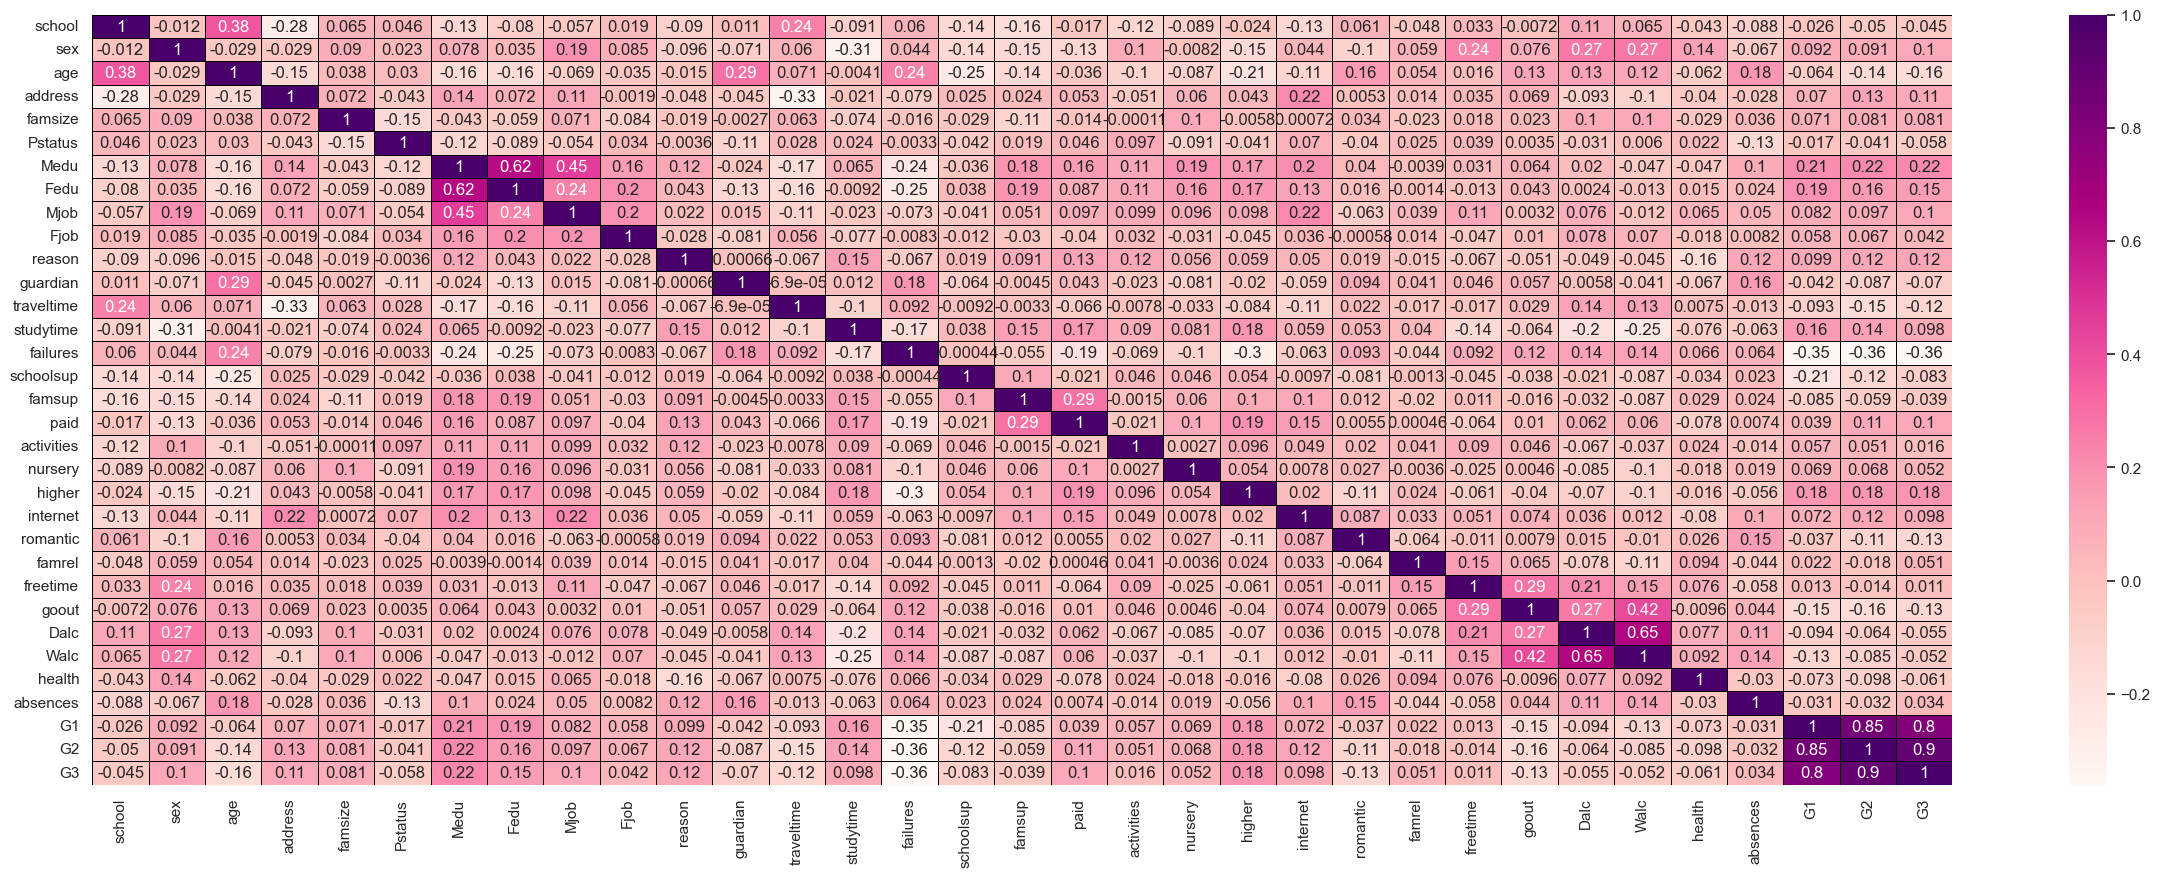

In [8]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(),cmap = 'RdPu',annot = True,linewidth = 0.5,linecolor = 'black')

In [9]:
columns = []
info = dict(df.corr()['G3'])
for column in info:
    if abs(info[column]) > 0.05 and column != 'G3':
        columns.append(column)

from sklearn.model_selection import train_test_split

X,y = df[columns], df['G3']
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25, random_state = 25)

<h3>Models</h3>

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

models = [LinearRegression(), ElasticNet(), RandomForestRegressor(),
          ExtraTreesRegressor(),GradientBoostingRegressor(),SVR()]

test_scores = {}
train_scores = dict()
for model in models:
    model.fit(xtrain, ytrain)
    
    test_score = round(model.score(xtest,ytest),3)
    train_score = round(model.score(xtrain,ytrain),3)
    
    test_scores[type(model).__name__] = test_score
    train_scores[type(model).__name__] = train_score

In [26]:
#Cross Validation
from sklearn.model_selection import KFold, cross_val_score
from statistics import mean

k_folds = KFold(n_splits = 5)
cross_val_scores = []
for model in models:
    scores_kfold = cross_val_score(model,X,y, cv = k_folds)
    scores_kfold = mean(scores_kfold)
    cross_val_scores.append(round(scores_kfold,3))

print(cross_val_scores)

[0.796, 0.809, 0.778, 0.787, 0.759, 0.785]


In [27]:
scores = {'Test Scores':list(test_scores.values()),
         'Train Scores':list(train_scores.values()),
         'Cross Validation Scores':cross_val_scores}

scores_df = pd.DataFrame(scores,index = [type(model).__name__ for model in models])
scores_df

,Test Scores,Train Scores,Cross Validation Scores
LinearRegression,0.807,0.841,0.796
ElasticNet,0.814,0.818,0.809
RandomForestRegressor,0.814,0.970,0.778
ExtraTreesRegressor,0.814,1.000,0.787
GradientBoostingRegressor,0.788,0.957,0.759
SVR,0.769,0.791,0.785


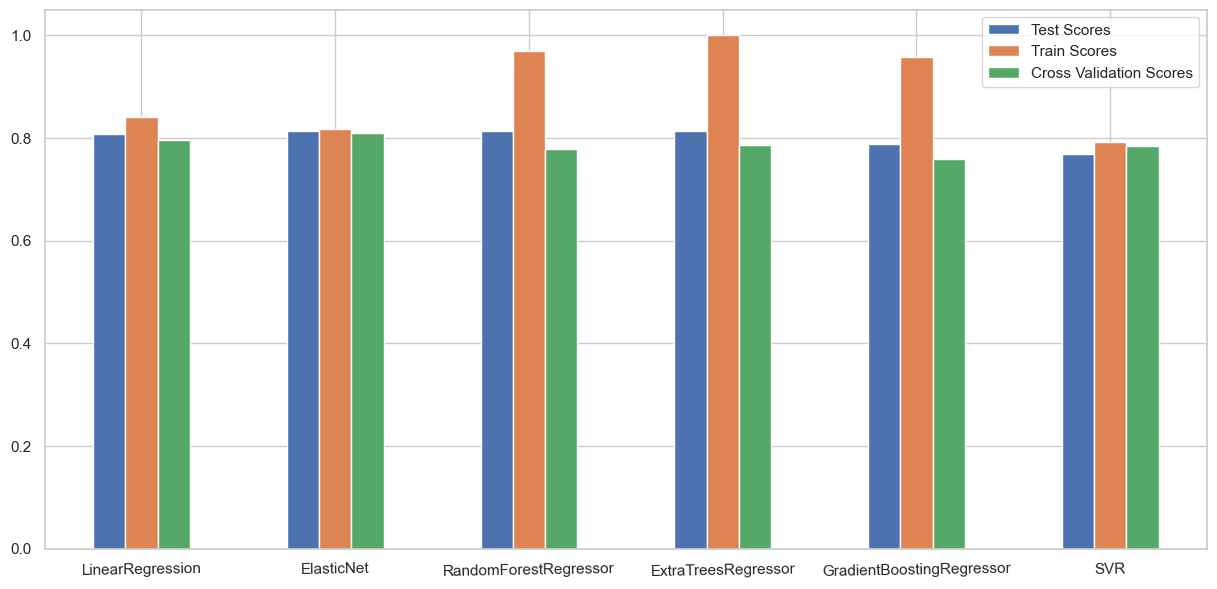

In [28]:
scores_df.plot.bar(figsize = (15,7),rot = True)
plt.show()

Considering the cross validation scores into account, the best models are <i><b>ElasticNet</b></i> and <i><b>Linear Regression</b><i>